In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X, y = mnist['data'].values, mnist['target']

In [18]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

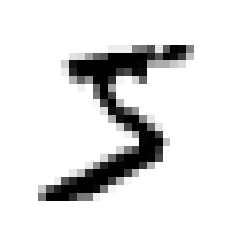

In [20]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [22]:
y = y.astype(np.uint8)

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [25]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [26]:
from sklearn.linear_model import SGDClassifier

In [27]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [29]:
sgd_clf.predict([some_digit])

array([ True])

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [34]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [35]:
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [37]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [40]:
y_scores = sgd_clf.decision_function([some_digit])

In [41]:
y_scores

array([2164.22030239])

In [42]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [43]:
from sklearn.metrics import precision_recall_curve

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [50]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.show()

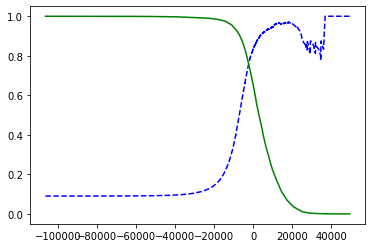

In [51]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [52]:
from sklearn.metrics import roc_curve

In [53]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

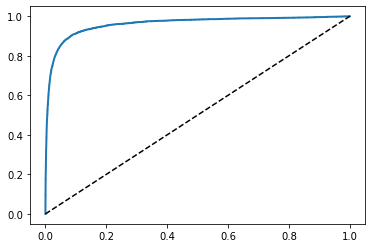

In [54]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616